# Chap04 - 모델 훈련

Chap01 ~ 03에서 실습때 사용한 머신러닝 모델은 작동 원리를 몰라도 사용할 수 있는 Scikit-Learn을 이용해 실습을 했었다. 

하지만, 머신러닝 알고리즘이 어떻게 작동하는지 알고 있으면, 데이터 분석 목적에 맞는 적절한 모델 그리고 하이퍼파라미터를 빠르게 찾을 수 있다. 

이번 장에서는 가장 간단한 모델인 선형 회귀(Linear Regression)에 대해 다음과 같이 두 가지 방법을 통해 알아본다.

> - 직접 계산할 수 있는 공식을 사용하여 Train Set에 가장 잘 맞는 파라미터를 구하는 방법
- 경사하강법(Gradient Descent)를 이용하여 반복적인 최적화 방식을 사용해 파라미터를 조금씩 수정하면서 비용함수를 Train Set에 대해 최소화시키는 파라미터를 구하는 방법

In [1]:
%load_ext watermark
%watermark -v -p numpy,scipy,sklearn,pandas,matplotlib,seaborn

CPython 3.6.5
IPython 6.3.1

numpy 1.14.3
scipy 1.0.1
sklearn 0.19.1
pandas 0.23.1
matplotlib 2.2.2
seaborn 0.9.0


## SetUp

In [2]:
import os
import numpy as np

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='AppleGothic')  # MacOS
plt.rcParams['axes.unicode_minus'] = False

## 4.1 선형 회귀(Linear Regression)


선형회귀(linear regression)은 데이터 집합 $\{ y_{i}, x_{i1}, \dots , x_{ip} \}_{i=1}^{n} $ 에 대해, 종속변수(label) $y_i$와 $p$개의 설명변수(feature) $x_i$ 사이의 선형 관계를 모델링한다(출처: wikipedia).

$$
y_i = w_1 x_{i1} + \cdots + w_{p} x_{ip} + b_i = \mathbf{x}_{i}^{T} \mathbf{W} + b_i, \quad i = 1, \dots , n 
$$

- $y_i$는 예측값
- $p$는 특성(feature)의 개수
- $x_ip$는 $p$번째 특성값
- $w_i$는 $i$번째 파라미터

위의 식을 Matrix형태로 나타내면 다음과 같다.

$$
y = \mathbf{X} \mathbf{W}
$$

$$
y = \begin{bmatrix} y_1 & \cdots  & y_n \end{bmatrix}^{T}, \quad \mathbf{X} = \begin{bmatrix} x_{ 1 }^{ T } & \cdots  & x_{ n }^{ T } \end{bmatrix}^{ T }=\begin{bmatrix} x_{ 11 } & \cdots  & x_{ 1p } \\ \vdots  & \cdots  & \vdots  \\ x_{ n1 } & \cdots  & x_{np} \end{bmatrix}
$$

$$
\mathbf{W} = \begin{bmatrix} w_{ 1 } & \cdots  & w_{ n } \end{bmatrix}^{T}
$$

$x_{i1}$, $i=1,\dots ,n$ 부분은 $y$절편에 해당하는 부분으로 bias($b$)라고도 하며, 상수값이다.

#### MSE (Mean Squared Error)

위의 선형 회귀 모델을 학습시켜 Train Set에 잘 맞는 파라미터를 찾아야 한다. 이러한 파라미터를 찾은 뒤 잘 맞는지 성능을 측정하는 지표로는 평균 제곱근 오차(RMSE, Root Mean Squared Error)가 있다. RMSE는 MSE식에 루트를 씌운것이므로, 결국 MSE를 최소화하는 파라미터 $\mathbf{W}$를 찾아야 한다. MSE 식은 다음과 같다.

$$
MSE = \frac{1}{n} \sum_{i=1}^{n}{\left( \mathbf{W}^{T} \cdot \mathbf{x}_{i} - y_{i}\right)}^{2}
$$

### 4.1.1 정규방정식

$$
\hat{\mathbf{W}} = \left( \mathbf{X}^{T} \cdot \mathbf{X} \right)^{-1} \cdot \mathbf{X}^{T} \cdot \mathbf{y}
$$

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

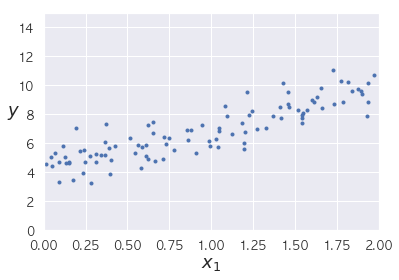

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # x0 = 1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

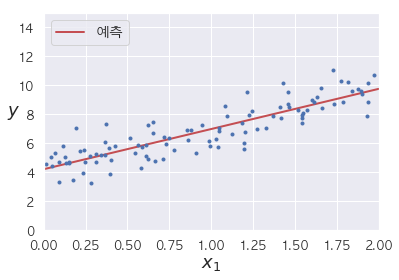

In [7]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="예측")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

위의 과정을 Scikit-Learn에서는 `LinearRegression`을 사용해 구할 수 있다.

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

/Users/cjh/miniconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [11]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## 4.2 경사 하강법

경사 하강법에서 중요한 하이퍼파라미터는 **학습률**(learning rate, $\eta$)이다. 학습률이 너무 작으면 수렴하는데까지 시간이 오래걸리고, 학습률이 너무 크면 발산하게 된다. 보통 로그 스케일로 0.001($10^{-3}$), 0.001($10^{-2}$)와 같이 지정한다.

경사 하강법을 사용할 때는 반드시 모든 특성(feature)들이 같은 스케일을 가지도록 해야한다(Standard 또는 MinMax 등). 그렇지 않으면 학습시간이 오래걸리게 된다. 

![](./images/gd.gif)

### 4.2.1 경사 하강법

$$
\frac{\partial}{\partial w_j} MSE(\mathbf{W}) = \frac{2}{m} \sum_{i=1}^{m}{\left( \mathbf{W}^{T} \cdot \mathbf{x}_{i} - y_{i}\right)}x_{ij}
$$

$$
\nabla_{\mathbf{W}} \text{MSE}(\mathbf{W}) = \begin{bmatrix} \frac { \partial  }{ \partial w_{ i } } { MSE }(W) \\ \vdots \\ \frac { \partial  }{ \partial w_{ i } } { MSE }(W) \end{bmatrix} = \frac{2}{m} \mathbf{X}^{T} \cdot \left( \mathbf{X} \cdot \mathbf{W} - \mathbf{y} \right)
$$

#### 경사 하강법 Step

$$
\mathrm{W} \leftarrow \mathrm{W} - \eta \nabla_{\mathbf{W}} \text{MSE}(\mathbf{W}) \Longleftrightarrow 
 \mathrm{W} \leftarrow \mathrm{W} - \eta \frac{\partial L}{\partial \mathrm{W}} 
$$

In [12]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

weight = np.random.randn(2, 1)  # random init

for step in range(n_iterations): 
    gradients = 2/m * X_b.T.dot(X_b.dot(weight) - y)
    weight = weight - eta * gradients
    
    if (step+1) % 200 == 0:
        print('Step :{:04d}, weight = \n {}'.format(step+1, weight))
    
print('최종 결과값 : \n{}'.format(weight))

Step :0200, weight = 
 [[4.21338573]
 [2.7716236 ]]
Step :0400, weight = 
 [[4.21509444]
 [2.7701149 ]]
Step :0600, weight = 
 [[4.21509616]
 [2.77011339]]
Step :0800, weight = 
 [[4.21509616]
 [2.77011339]]
Step :1000, weight = 
 [[4.21509616]
 [2.77011339]]
최종 결과값 : 
[[4.21509616]
 [2.77011339]]


In [13]:
weight_path_bgd = []

def plot_gradient_descent(weight, eta, weight_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(weight)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(weight) - y)
        weight = weight - eta * gradients
        if weight_path is not None:
            weight_path.append(weight)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

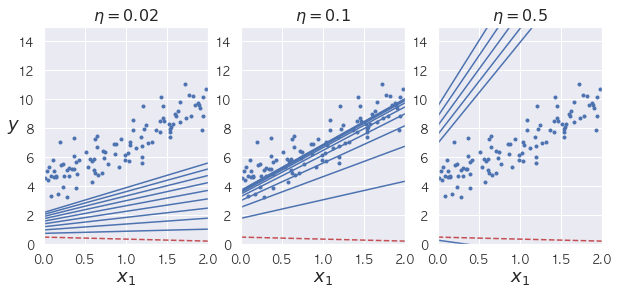

In [14]:
np.random.seed(42)
weight = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(weight, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(weight, eta=0.1, weight_path=weight_path_bgd)
plt.subplot(133); plot_gradient_descent(weight, eta=0.5)
plt.show()

### 4.2.2 확률적 경사 하강법

경사 하강법의 가장 큰 문제는 매 스텝(step)에서 전체 Train Set을 사용해 Gradient Descent를 계산한다는 것이다. 따라서, Train Set가 커지면 학습이 매우 느려지게 된다. 

이를 해결하기 위해, **확률적 경사 하강법**(Stochastic Gradient Descent)은 매 스텝에서 랜덤하게 하나의 데이터(샘플)을 선택해 Gradient Descent(GD)를 계산한다. 따라서, 전체 데이터를 이용해 GD를 계산하는 것보다 속도는 빠르지만 훨씬 불안정하다. 비용 함수(Loss Function)가 최소값에 수렴할 때까지 부드럽게 감소하지 않고, 위아래로 요동치면서 평균적으로 감소한다. 

이처럼 비용 함수가 불규칙하게 요동치면서 감소할 경우 지역 최소값(local minimum)을 건너뛸 수 있는 가능성이 있기 때문에, SGD가 전역 최소값(global minimum)을 찾을 가능성이 높다. 하지만 이러한 무작위성은 지역 최소값을 탈출할 수 있지만, 전역 최소값에는 다다르지 못하는 경우가 있다. 이를 해결하기 위해 학습률(learning rate)을 점진적으로 감소 시키는 **learning rate decay** 기법을 사용한다. 

learning rate decay(또는 learning rate schedule)는 학습을 시작할 때는 학습률을 크게하고, 점진적으로 학습률을 줄여 전역 최소값에 도달하게 하는 방법이다.

In [15]:
weight_path_sgd = []
m = len(X_b)
np.random.seed(42)

Epoch :010, weight = 
 [[4.06816038]
 [2.87191524]]
Epoch :020, weight = 
 [[4.31147477]
 [2.36946783]]
Epoch :030, weight = 
 [[4.15164305]
 [3.02460342]]
Epoch :040, weight = 
 [[4.52385874]
 [2.57195944]]
Epoch :050, weight = 
 [[3.7625155]
 [2.5892927]]


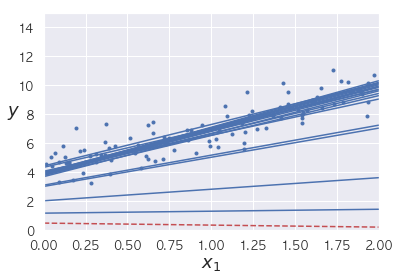

In [16]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

weight = np.random.randn(2, 1)  # random init

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(weight)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
            
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(weight) - yi)
        eta - learning_schedule(epoch * m + i)
        weight = weight - eta * gradients
        weight_path_sgd.append(weight)
        
    if (epoch+1) % 10 == 0:
        print('Epoch :{:03d}, weight = \n {}'.format(epoch+1, weight))
        
        
plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
plt.show()    

Scikit-Learn에서는 SGD방법을 이용한 Regression인 `SGDRegressor` 클래스가 있다.

In [17]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16782089]), array([2.72603052]))

### 4.2.3 미니배치 경사 하강법

**미니배치 경사 하강법**(Mini-batch Gradient Descent)은 각 스텝에서 전체 Train Set을  미니배치(mini-batch), 즉 작은 데이터셋을 추출한 뒤 Gradient를 계산하는 방법이다. 미니배치 경사하강법의 장점은 행렬 연산에 최적화된 하드웨어, GPU에서 빠르게 수행되는 것이다. 

미니배치 경사 하강법은 SGD에 비해 덜 불규칙하게 감소하지만, local minimum에 빠질 확률은 높은 경우가 있다.

In [23]:
weight_path_mgd = []

n_iterations = 100
minibatch_size = 20

np.random.seed(42)
weight = np.random.randn(2,1)  # random init

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(weight) - yi)
        eta = learning_schedule(t)
        weight = weight - eta * gradients
        weight_path_mgd.append(weight)
        
    if (epoch+1) % 10 == 0:
        print('Epoch :{:03d}, weight = \n {}'.format(epoch+1, weight))

Epoch :010, weight = 
 [[4.11876962]
 [2.71062372]]
Epoch :020, weight = 
 [[4.29567078]
 [2.85337842]]
Epoch :030, weight = 
 [[4.26475032]
 [2.83179316]]
Epoch :040, weight = 
 [[4.2695937 ]
 [2.84744074]]
Epoch :050, weight = 
 [[4.25214635]
 [2.7896408 ]]
Epoch :060, weight = 
 [[4.17570373]
 [2.71753586]]
Epoch :070, weight = 
 [[4.18828417]
 [2.73913778]]
Epoch :080, weight = 
 [[4.23775075]
 [2.79420372]]
Epoch :090, weight = 
 [[4.19059905]
 [2.7524648 ]]
Epoch :100, weight = 
 [[4.15421822]
 [2.69721385]]


In [24]:
weight_path_bgd = np.array(weight_path_bgd)
weight_path_sgd = np.array(weight_path_sgd)
weight_path_mgd = np.array(weight_path_mgd)

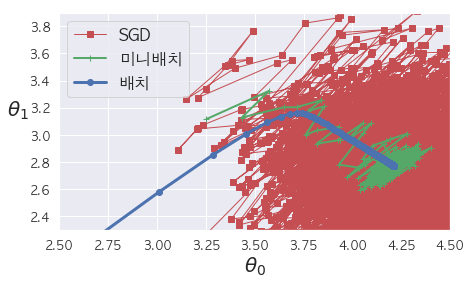

In [25]:
plt.figure(figsize=(7,4))
plt.plot(weight_path_sgd[:, 0], weight_path_sgd[:, 1], "r-s", linewidth=1, label="SGD")
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-+", linewidth=2, label="미니배치")
plt.plot(weight_path_bgd[:, 0], weight_path_bgd[:, 1], "b-o", linewidth=3, label="배치")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

## 4.3 다항 회귀 (Polynomial Regression)

**다항 회귀**(polynomial regression)는 각 특성(feature)의 제곱을 새로운 특성으로 추가하여 선형 모델을 학습시키는 방법을 말한다. 다항 회귀의 식은 다음과 같다.

$$
y = w_0 + w_1 x_1 + w_2 x_2^{2} + \cdots w_n x_n^{m} 
$$

In [26]:
np.random.seed(42)

In [28]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

위의 식, 

$$
y = 0.5 x^2 + 2x + 2 + \epsilon
$$

에 대해 그래프를 그려보면 다음과 같다.

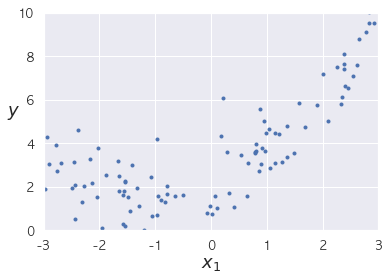

In [29]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

위의 식에 맞게끔 Scikit-Learn의 `PolynomialFeatures`를 이용해 데이터의 특성(feature, 여기서 $X$)을 제곱해 보자.

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print('X[0] :', X[0])
print('X_poly[0] :', X_poly[0])

X[0] : [-0.49553398]
X_poly[0] : [-0.49553398  0.24555393]


위에서 추가한 특성을 이용해 `LinearRegression`을 이용해 모델을 적합시켜 보자.

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
lin_reg.intercept_, lin_reg.coef_

(array([2.06378633]), array([[1.03980376, 0.49203671]]))

예측된 모델은 다음과 같다.

$$
y = 0.49 x^2 + 1.04 x + 2.064
$$

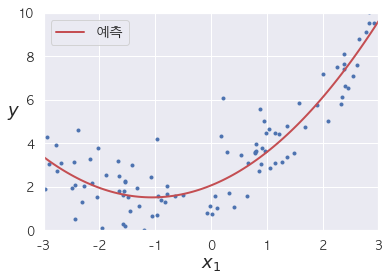

In [35]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="예측")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## 4.4 학습 곡선 (Learning Curve)

고차 다항 회귀를 사용하면 선형 회귀(linear regression)보다 Train Set에 Overfitting 될 위험이 크다. 

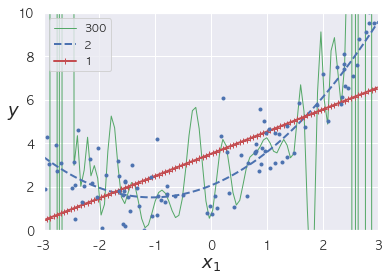

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

이렇게 과적합 되었는지를 확인하는 방법으로는 **학습 곡선**(learning curve)을 이용해 확인할 수 있다.

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 모델의 학습 곡선을 그리는 함수 정의
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("훈련 세트 크기", fontsize=14)       
    plt.ylabel("RMSE", fontsize=14)  

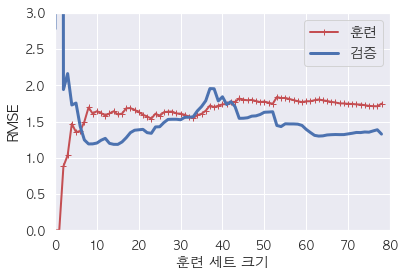

In [42]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                        
plt.show()          

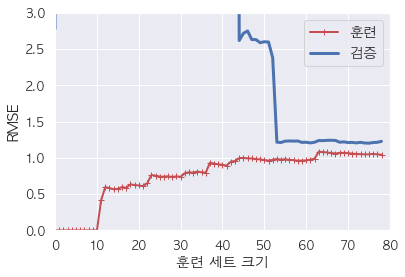

In [41]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                   

위의 학습곡선 그래프에서 다음을 확인할 수 있다.

- 훈련 데이터(train set)의 오차가 선형 회귀 모델 보다 훨씬 낮은것을 알 수 있다.
- 그리고 다항 회귀 모델이 훈련 데이터의 오차가 검증(test set) 데이터 보다 낮은것을 알 수 있는데, 이것이 바로 Overfitting되었다는 증거이다.

## 4.5 규제(Regularization)가 있는 선형 모델

### 4.5.1 릿지 회귀 (Ridge Regression)

**릿지 회귀**(또는 티호노프 규제)는 규제(regularization)가 추가된 선형 회귀 모델이다. 규제항(regularization term) $\lambda \sum_{i=1}^{n}{w_{i}^{2}}$ 이 비용함수(loss function)에 추가된다. 

따라서, 모델(알고리즘)을 데이터에 적합 시키는 것뿐만 아니라 모델의 가중치가 가능한 작게 유지되도록 한다. 규제항은 학습에만 사용되며 테스트 시에는 규제항이 사용되지 않는다.

$$
J(w) = \text{MSE}(w) + \lambda \sum_{i=1}^{n}{w_{i}^{2}}
$$

위의 식에서 $\lambda$는 하이퍼파라미터이며, 모델을 얼마나 많이 규제할지 조절한다. $\lambda = 0$이면 릿지 회귀는 일반 선형 회귀와 같아지며, $\lambda$가 커지게되면 모든 가중치가 거의 0에 가까워져, 결국 데이터의 평균을 지나는 선이 된다.

릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 데이터 스케일을 맞춰주는것이 중요하다.

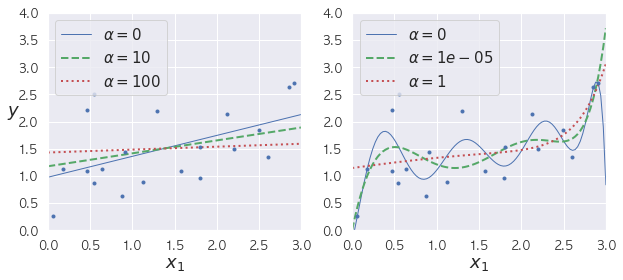

In [44]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

릿지 회귀의 정규방정식은 다음과 같다.

$$
\hat{\mathbf{W}} = \left( \mathbf{X}^{T} \cdot \mathbf{X} + \lambda I \right)^{-1} \cdot \mathbf{X}^{T} \cdot \mathbf{y}
$$

In [46]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky', random_state=42)  # alpha == lambda
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='cholesky', tol=0.001)

In [47]:
ridge_reg.predict([[1.5]])

array([[1.55071465]])

`SGDRegressor()`에서 `penalty`인자는 사용할 규제를 정의하는 인자이다. `l2`는 릿지 회귀를 의미한다.

In [48]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.13500145])

### 4.5.2 라쏘 회귀 (Lasso Regression)

**라쏘**(Lasso, Least Absolut Shrinkage and Selection Operator) 회귀는 또 다른 규제의 한 종류다. 라쏘의 규제항은 $\lambda \sum_{i=1}^{n}{\left| w_i \right|}$ 이며, 비용함수는 다음과 같다.

$$
J(w) = \text{MSE}(w) + \lambda \sum_{i=1}^{n}{\left| w_i \right|}
$$

라쏘 회귀의 중요한 특징은 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 버린다. 따라서, 라쏘 회귀는 모델에 필요한 특성을 선택하여 **희소 모델**(sparse model)을 만든다.

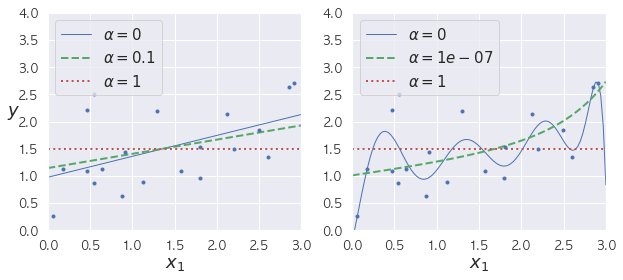

In [52]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.show()

In [57]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
lasso_reg.predict([[1.5]])

array([1.53788174])

In [59]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l1", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.13498188])

#### Lasso vs Ridge

In [54]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# 편향은 무시
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

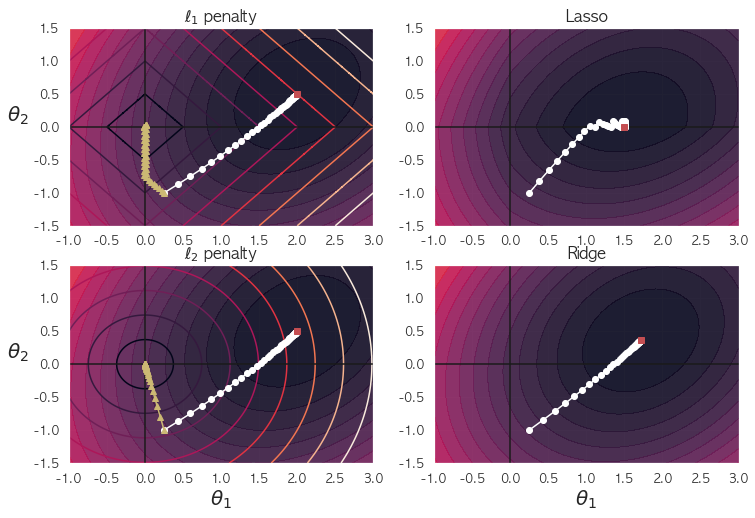

In [55]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0, labelpad=15)
    if i == 1: plt.xlabel(r"$\theta_1$", fontsize=20)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1: plt.xlabel(r"$\theta_1$", fontsize=20)

plt.show()

### 4.5.3 엘라스틱넷 (Elastic Net)

**엘라스틱 넷**(Elastic Net)은 릿지(Ridge) 회귀와 라쏘(Lasso) 회귀를 절충한 모델이다. 

$$
J(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{w_i}^2 + \left( 1 - \alpha \right) \sum_{i=1}^{n}{\left| w_i \right|}, \quad \alpha = \frac{\lambda_2}{\lambda_2 + \lambda_1}
$$

- $\lambda_2$ : $L_2$, 즉 릿지 회귀의 하이퍼파라미터
- $\lambda_1$ : $L_1$, 즉 라쏘 회귀의 하이퍼파라미터

#### 어떠한 규제를 사용해야 할까?

- 규제(regularization)가 있는 모델이 대부분의 경우에 좋으므로 규제가 없는 모델을 사용하기 보다는 규제가 있는 모델을 사용하는 것이 좋다.
- 대부분의 경우에는 $L_2$ 규제 즉, 릿지가 좋지만 모델에 사용되는 특성이 적을것이라고 예상되는 경우에는 라쏘나, 엘라스틱넷을 사용하는 것이 좋다.
    - 그 이유는, 라쏘나 엘라스틱넷은 불필요한 특성을 0으로 만들어 주기 때문이다.
- 특성 수가 Train set 보다 많거나 몇개의 특성이 강한 상관성을 보인다면 엘라스틱넷을 사용하는 것이 좋다.

In [60]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

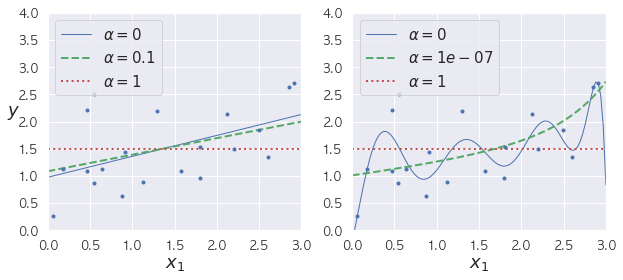

In [61]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(ElasticNet, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(ElasticNet, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.show()

### 4.5.4 조기 종료

또 다른 규제 방법은 경사 하강법을 이용해 학습하면서 검증 세트의 error가 최소값에 도달했을 때 스텝이 남았더라도 학습을 중지하는 **조기 종료**(early stopping)이 있다.

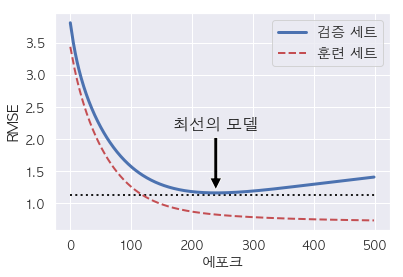

In [62]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('최선의 모델',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="훈련 세트")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("에포크", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

## 4.6 로지스틱 회귀 (Logistic Regression)

로지스틱 회귀는 이진 분류 알고리즘 중 하나인 모델이다.

### 4.6.1 확률 추정

로지스틱 회귀는 선형 회귀(linear regression)과 같이 입력 특성(feature)의 가중치 합을 계산한 뒤 로지스틱 함수(sigmoid)를 적용해 출력값을 계산한다. 

$$
\hat{p} = h_{w}(\mathbf{x}) = \sigma \left( \mathbf{W}^{T} \cdot \mathbf{x} \right)
$$

위의 식에서 $\sigma(\cdot)$이 바로 로지스틱(또는 로짓) 함수이며 0과 1사이의 값을 출력하는 **시그모이드 함수**(sigmoid function)이다.

$$
\sigma(x) = \frac{1}{1 + \text{exp}(-x)}
$$

로지스틱 회귀의 모델은 아래와 같이 할 수 있다. 하지만, 상황에 따라 임계값(threshold)를 조절해줄 수 있ㄷ.

$$
\hat{y} = \begin{cases} 0 \quad \hat{p} < 0.5 \\ 1 \quad \hat{p} \ge 0.5 \end{cases}
$$

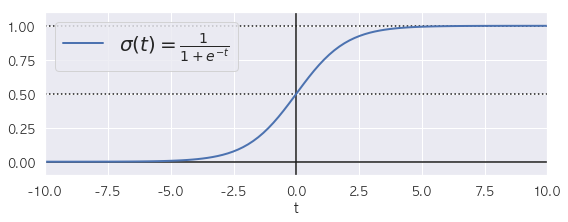

In [63]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

### 4.6.2 훈련과 비용 함수

Logistic Regression의 학습 데이터 하나에 대한 비용 함수는 다음과 같다.

$$
c(\mathbf{W}) = \begin{cases} -\log{\left( \hat{p} \right)} \quad \text{if, }y=1 \\ -\log{\left(1-\hat{p}\right)} \quad \text{if, }y = 0 \end{cases}
$$

전체 Train Set에 대한 비용 함수는 모든 데이터에 대한 비용의 평균이며, 이것을 **로그 손실**(log loss)라고 한다. 

$$
J(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\left[ y_{i} \log{\left( \hat{p}_i \right)} + \left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)} \right]}
$$

로그 손실을 $\mathbf{W}$로 미분하면 다음과 같다.

$$
\frac{\partial}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m}{\left( \sigma \left( \mathbf{W}^{T} \cdot \mathbf{x}_i \right) - \mathbf{y}_i \right)} x_{ij}
$$

### 4.6.3 결정 경계

로지스틱 회귀를 iris(붓꽃) 데이터 셋을 이용해 알아보자.

- sepal length: 꽃받침 길이
- sepal width: 꽃받침 너비
- petal length: 꽃잎 길이
- petal width: 꽃잎 너비

![](./images/iris.png)

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [4]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [9]:
import pandas as pd

In [14]:
iris_df = pd.DataFrame(iris['data'], columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Petal width를 이용한 Verginca 종 분류기 구현

먼저 꽃잎의 너비를 이용해 iris 중에서 Verginca 종을 분류하는 분류기를 만들어 보자.

In [16]:
X = iris['data'][:, 3:]  # 꽃잎 너비
y = (iris['target'] == 2).astype(np.int)  # Verginca면 1 아니면 0

In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

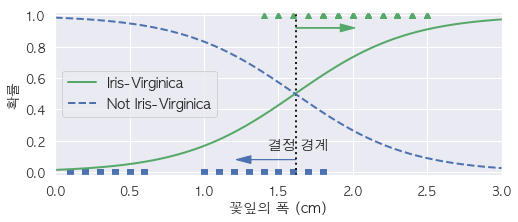

In [19]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "결정 경계", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("꽃잎의 폭 (cm)", fontsize=14)
plt.ylabel("확률", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [21]:
decision_boundary

array([1.61561562])

In [22]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

#### Petal width, Petal length를 이용한 Verginca 분류기 구현

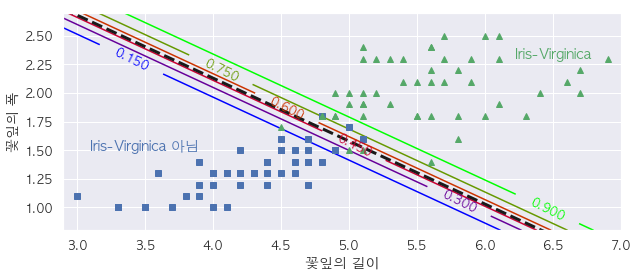

In [23]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Iris-Virginica 아님", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("꽃잎의 길이", fontsize=14)
plt.ylabel("꽃잎의 폭", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

### 4.6.4 소프트맥스 회귀 (Softmax Regression)

로지스틱 회귀 모델은 여러개의 이진 분류기를 만들지 않고, 다중 클래스(multinomial class) 분류에 적용할 수 있다. 이것을 **소프트맥스 회귀**(Softmax Regression) 또는 **다항 로지스틱 회귀**(Multinomial Logistic Regression)이라고 한다.

소프트맥스 회귀의 개념은 데이터 $x$에 대해 소프트맥스 회귀 모델이 각 클래스 $k$에 대한 점수(score) $S_k \left( x \right)$를 계산하고, 그 점수값에 **소프트맥스 함수**(softmax function)를 적용하여 각 클래스의 확률을 예측하는 모델이다. 

$$
S_k \left( \mathbf{x} \right) = \left( \mathbf{W}_{k} \right)^{T} \cdot \mathbf{x}
$$

- $\mathbf{W}_{k}$ : 각 클래스별 가중치 파라미터 벡터

위의 식을 이용해 소프트 맥스 함수를 적용한 식은 다음과 같다.

$$
\hat{p}_k = \sigma \left( s(\mathbf{x}) \right)_k = \frac{ \text{exp} \left( S_k(\mathbf{x}) \right)}{\sum_{j=1}^{K}{\text{exp} \left( S_j (\mathbf{x}) \right)}}
$$

- $K$ : 클래스의 수
- $s(\mathbf{x})$ : 데이터 샘플 $\mathbf{x}$에 대한 각 클래스의 점수를 담고 있는 벡터
- $\sigma \left( S(\mathbf{x}) \right)_k$ : 샘플 $\mathbf{x}$에 대한 클래스 $k$에 속할 추정 확률 벡터

위의 식에서 추정된 확률 벡터 중 확률이 가장 높은 클래스로 분류가 된다. 이를 식으로 나타내면 다음과 같다.

$$
\hat{y} = \underset{k}{\text{arg}} \max{\sigma \left( S(\mathbf{x}) \right)_k} = \underset{k}{\text{arg}} \max{S_k(\mathbf{x})} = \underset{k}{\text{arg}} \max{\left( \mathbf{W_k}^{T} \cdot \mathbf{x}\right) } 
$$

소프트맥스 회귀의 학습을 위한 손실함수(loss function)은 **크로스 엔트로피**(cross entropy)이며 다음과 같다.

$$
J(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\sum_{k=1}^{K}{y_k^{(i)} \log{\left( \hat{p}_k^{(i)} \right)}}}
$$

- $i$번째 샘플에 대한 타겟 클래스가 $k$일 때, $y_k^{(i)}$가 1이고, 나머지는 0이 된다.

위의 손실함수에 대한 그래디언트 벡터는 다음과 같다.

$$
\nabla_{w^{(k)}} J(\mathbf{W}) = \frac{1}{m} \sum_{i=1}^{m}{\left( \hat{p}_k^{(i)} - y_k^{(i)} \right)\mathbf{x}^{(i)}}
$$

#### Scikit-Learn `LogisticRegression`을 이용해 Softmax Regression 사용하기

Scikit-Learn에서 [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)은 셋 이상의 다중 클래스 분류에서는 기본적으로 일대다(OvA)를 디폴트 값으로 사용하지만, `multi_class`인자를 `multinomial`로 설정하면 Softmax Regression을 사용할 수 있다. 또한 `solver` 인자에 `lbfgs`로 지정해야한다.

In [24]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

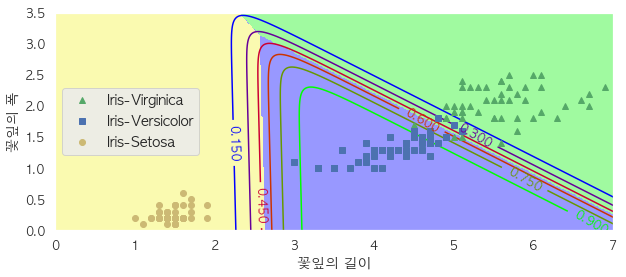

In [25]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("꽃잎의 길이", fontsize=14)
plt.ylabel("꽃잎의 폭", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [26]:
softmax_reg.predict([[5, 2]])

array([2])

In [27]:
softmax_reg.predict_proba([[5, 2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])